**Copyright 2020 Marcel Arpogaus**

    Licensed under the Apache License, Version 2.0 (the "License");
    you may not use this file except in compliance with the License.
    You may obtain a copy of the License at
 
        http://www.apache.org/licenses/LICENSE-2.0
 
    Unless required by applicable law or agreed to in writing, software
    distributed under the License is distributed on an "AS IS" BASIS,
    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    See the License for the specific language governing permissions and
    limitations under the License.

# Introduction

## Motivation: Need for Complex Distributions

The shape of the data distribution in many real applications are very complex.
Transformation models are an easy way to replace simple Distributions (like a Gaussian) with more expressive ones.

| Gaussian                                                     | Transformation Model                       |
|:-------------------------------------------------------------|:-------------------------------------------|
| ![gauss](gfx/gauss.png)                                      | ![flow](gfx/flow.png)                      |

## Purpose of this Notebook

You will learn how to fit a ANN to simple (unconditional) bimodal data using a Transformed Distribution.

We wont cover any of the theoretical fundamentals here.
A basic introduction can be found in [this Notebook](TheoreticalBackground.ipynb), for additional information references to the primary sources are provided.

If you have any technical issues or suggestion regarding my implementation, please feel free to either [contact me](mailto:marcel.arpogaus@gmail.com), [open an issue](https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/issues/new) or send me a [Pull Request](https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector#contributing).

Any contributions are **greatly appreciated**.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/blob/master/ipynb/Gaussian_vs_Transformation_Model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/blob/master/ipynb/Gaussian_vs_Transformation_Model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector/blob/master/ipynb/Gaussian_vs_Transformation_Model.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation:-Need-for-Complex-Distributions" data-toc-modified-id="Motivation:-Need-for-Complex-Distributions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation: Need for Complex Distributions</a></span></li><li><span><a href="#Purpose-of-this-Notebook" data-toc-modified-id="Purpose-of-this-Notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose of this Notebook</a></span></li><li><span><a href="#Dependencies-&amp;-Prerequisites" data-toc-modified-id="Dependencies-&amp;-Prerequisites-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dependencies &amp; Prerequisites</a></span><ul class="toc-item"><li><span><a href="#Install-Dependencies" data-toc-modified-id="Install-Dependencies-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Install Dependencies</a></span></li><li><span><a href="#Import-Libaries" data-toc-modified-id="Import-Libaries-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Import Libaries</a></span></li><li><span><a href="#Ensure-Reproducibility" data-toc-modified-id="Ensure-Reproducibility-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ensure Reproducibility</a></span></li></ul></li><li><span><a href="#Function-Definitions" data-toc-modified-id="Function-Definitions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Function Definitions</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#TensorFlow-Dataset-API" data-toc-modified-id="TensorFlow-Dataset-API-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>TensorFlow Dataset API</a></span></li></ul></li><li><span><a href="#Fitting-a-Gaussian-to-the-data" data-toc-modified-id="Fitting-a-Gaussian-to-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fitting a Gaussian to the data</a></span><ul class="toc-item"><li><span><a href="#Output-Distribution" data-toc-modified-id="Output-Distribution-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Output Distribution</a></span></li><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Sample</a></span></li></ul></li><li><span><a href="#Fitting-the-Normalizing-Flow-to-the-data" data-toc-modified-id="Fitting-the-Normalizing-Flow-to-the-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fitting the Normalizing Flow to the data</a></span><ul class="toc-item"><li><span><a href="#Probability-Model" data-toc-modified-id="Probability-Model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Probability Model</a></span></li><li><span><a href="#Model-Definition" data-toc-modified-id="Model-Definition-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Model Definition</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Sample" data-toc-modified-id="Sample-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Sample</a></span></li></ul></li></ul></div>

##  Dependencies & Prerequisites

### Install Dependencies

In [1]:
try:
    from google.colab import drive
    !pip install git+https://github.com/MArpogaus/TensorFlow-Probability-Bernstein-Polynomial-Bijector.git
except:
    print('Not running in Colab')

Not running in Colab


### Import Libaries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="paper")  # improved plt styles

In [4]:
import tensorflow as tf
import tensorflow_probability as tfp

from tensorflow_probability import distributions as tfd

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam

Import The transformed distribution:

In [5]:
from bernstein_flow.distributions import BernsteinFlow

### Ensure Reproducibility

In [6]:
np.random.seed(2)
tf.random.set_seed(2)
print("TFP Version", tfp.__version__)
print("TF  Version", tf.__version__)

TFP Version 0.11.1
TF  Version 2.3.0


## Function Definitions

We want to minimize the negative log-likelihood:

In [7]:
def negloglik(y_true, y_hat):
    nll = -y_hat.log_prob(y_true)
    return nll

## Data

Classic dataset containing the waiting time between eruptions and the duration of the eruption for the [Old Faithful Geyser](https://en.wikipedia.org/wiki/Old_Faithful) in [Yellowstone National Park](https://en.wikipedia.org/wiki/Yellowstone_National_Park).

Extracted from the [built-in dataset in R](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html).

Reference:  A. Azzalini and A. W. Bowman, “A Look at Some Data on the Old Faithful Geyser,” Journal of the Royal Statistical Society. Series C (Applied Statistics), vol. 39, no. 3, pp. 357–365, 1990, doi: 10.2307/2347385.

In [8]:
y = np.asarray(
    (0.6694, 0.3583, 0.6667, 0.6667, 0.6667, 0.3333, 0.7306, 0.7139, 0.3389, 0.8056, 0.3056, 0.9083, 0.2694, 0.8111,
     0.7306, 0.2944, 0.7778, 0.3333, 0.7889, 0.7028, 0.3167, 0.8278, 0.3333, 0.6667, 0.3333, 0.6667, 0.4722, 0.75,
     0.6778, 0.6194, 0.5861, 0.7444, 0.3694, 0.8139, 0.4333, 0.6917, 0.3667, 0.7944, 0.3056, 0.7667, 0.3778, 0.6889,
     0.3333, 0.6667, 0.3333, 0.6667, 0.3139, 0.7111, 0.3472, 0.7444, 0.4167, 0.6667, 0.2944, 0.7222, 0.3639, 0.7472,
     0.6472, 0.5556, 0.6222, 0.6667, 0.325, 0.8778, 0.3333, 0.6667, 0.3333, 0.6667, 0.3333, 0.6667, 0.5889, 0.3611, 0.75,
     0.3361, 0.6917, 0.7, 0.7222, 0.3222, 0.775, 0.6361, 0.6722, 0.6944, 0.7778, 0.3028, 0.6667, 0.5, 0.6667, 0.3333, 0.7417,
     0.3417, 0.7083, 0.3194, 0.7778, 0.2889, 0.7306, 0.2944, 0.7667, 0.3111, 0.7417, 0.2722, 0.8389, 0.3028, 0.85, 0.2722, 0.7139,
     0.3333, 0.6667, 0.3333, 0.7556, 0.3333, 0.6667, 0.4889, 0.7889, 0.65, 0.325, 0.6861, 0.3, 0.7778, 0.3056, 0.7833, 0.3528, 0.7972,
     0.3028, 0.6833, 0.775, 0.6667, 0.3333, 0.6667, 0.6667, 0.7028, 0.6889, 0.6556, 0.625, 0.7361, 0.4111, 0.6944, 0.6333, 0.7194,
     0.6444, 0.7806, 0.2833, 0.8278, 0.7111, 0.7639, 0.6667, 0.6667, 0.6667, 0.6667, 0.3306, 0.7667, 0.1389, 0.8194, 0.2889, 0.7639,
     0.2833, 0.7917, 0.3056, 0.75, 0.3111, 0.7417, 0.7417, 0.6667, 0.8, 0.6667, 0.6667, 0.3333, 0.6667, 0.3222, 0.7639, 0.3333, 0.6167,
     0.4778, 0.8056, 0.575, 0.7306, 0.3, 0.7333, 0.4139, 0.7528, 0.35, 0.725, 0.7278, 0.2972, 0.8194, 0.3028, 0.6667, 0.6667, 0.6667, 0.6444,
     0.3083, 0.7833, 0.3361, 0.7444, 0.3111, 0.6944, 0.3167, 0.7083, 0.5417, 0.7028, 0.3139, 0.8306, 0.3083, 0.6667, 0.3278, 0.7944, 0.6667, 0.3333,
     0.6667, 0.6667, 0.3972, 0.7361, 0.7028, 0.7278, 0.3333, 0.7417, 0.2917, 0.75, 0.2694, 0.7833, 0.4278, 0.6167, 0.7056, 0.3222, 0.725, 0.6667, 0.6667,
     0.6667, 0.7028, 0.6667, 0.6889, 0.3139, 0.7444, 0.325, 0.7028, 0.2861, 0.7417, 0.7083, 0.6611, 0.7306, 0.3278, 0.7417, 0.7111, 0.3194, 0.7361, 0.5,
     0.6667, 0.3333, 0.6667, 0.5472, 0.3056, 0.7694, 0.3056, 0.7694, 0.7667, 0.7083, 0.3222, 0.8306, 0.3278, 0.7167, 0.7, 0.7556, 0.7333, 0.7694, 0.3333,
     0.6667, 0.6667, 0.6528, 0.3333, 0.75, 0.3, 0.6667, 0.4583, 0.7889, 0.6611, 0.325, 0.8278, 0.3083, 0.8, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667,
     0.6667, 0.3333, 0.6667, 0.3222, 0.7222, 0.2778, 0.7944, 0.325, 0.7806, 0.3222, 0.7361, 0.3556, 0.6806, 0.3444, 0.6667, 0.6667, 0.3333),
    np.float32
)

In [9]:
x = np.ones((y.shape[0], 1)) # We us ones to mimic unconditional data

### TensorFlow Dataset API

[`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) API supports writing descriptive and efficient input pipelines

In [10]:
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=len(y))
dataset = dataset.batch(32)
dataset = dataset.prefetch(1)
dataset

<PrefetchDataset shapes: ((None, 1), (None,)), types: (tf.float64, tf.float32)>

## Fitting a Gaussian to the data

### Output Distribution

In [11]:
def gauss_lambda(pvector):
   #First output of the network defines mu, the second the scale sigma 
   return tfd.Normal(loc=pvector[:,0], scale=1e-3 + tf.math.softplus(0.05 * pvector[:,1]))

### Model Definition

In [12]:
gauss_model = tf.keras.Sequential()
gauss_model.add(InputLayer(input_shape = (1)))
#Here could come a gigantus network
gauss_model.add(Dense(2)) #We need to model the mean and the std of a Gaussian
gauss_model.add(tfp.layers.DistributionLambda(
    lambda pv:
        tfd.Normal(loc=pv[:,0], scale=1e-3 + tf.math.softplus(0.05 * pv[:,1]))
))

In [13]:
gauss_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=negloglik
)

### Training

In [14]:
hist = gauss_model.fit(
    dataset,
    epochs=500,
    verbose=False
)

(<AxesSubplot:>, -0.23897387087345123)

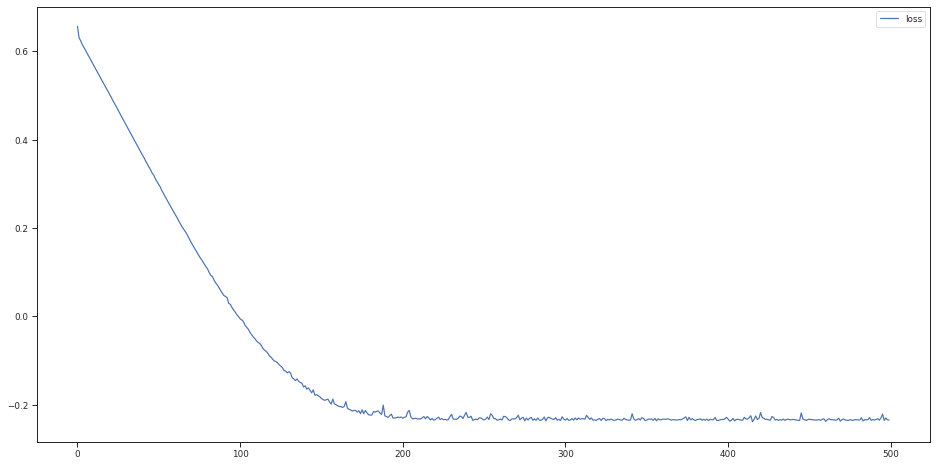

In [15]:
hist_df = pd.DataFrame(hist.history)
hist_df.plot(figsize=(16,8)), hist_df.loss.min()

### Result

In [16]:
# Get the distribution for a single x-values (unconditioned so they are all 1)
gauss = gauss_model(np.ones(1, dtype='float32'))

In [17]:
times = np.linspace(0,1.2)
gp = gauss.prob(times)

Mean of data  0.57680637  Mean of Distribution  [0.58073926]
Spread of data  0.19100468  Mean of Distribution  [0.1916877]


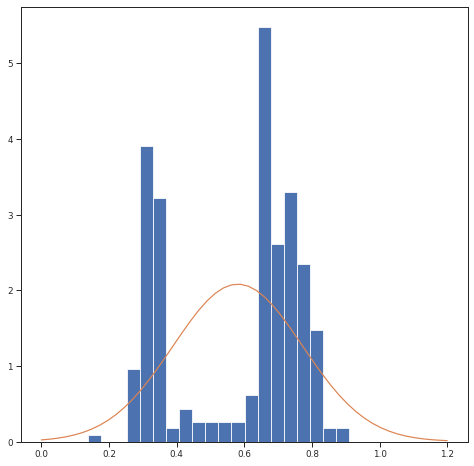

In [18]:
fig = plt.figure(figsize=(8,8))
plt.hist(y, 20, density=True)
plt.plot(times, gp)

print("Mean of data ", np.mean(y), " Mean of Distribution ", gauss.mean().numpy())
print("Spread of data ", np.std(y), " Mean of Distribution ", gauss.stddev().numpy())

As you can see the normal distribution is not flexible enough to represent the data source.

### Sample

In [19]:
gauss.sample(2)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.23540682],
       [0.6920429 ]], dtype=float32)>

## Fitting the Normalizing Flow to the data

### Probability Model

In [20]:
bernstein_order = 9

### Model Definition

In [21]:
flow_model = tf.keras.Sequential()
flow_model.add(InputLayer(input_shape = (1)))
#Here could come a gigantus network
flow_model.add(Dense(4 + bernstein_order)) # Bernstein coefficients and 2 times scale and shift
flow_model.add(tfp.layers.DistributionLambda(BernsteinFlow)) #<--- Replace the Normal distribution with the Transformed Distribution

In [22]:
flow_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss=negloglik
)

### Training

In [23]:
hist = flow_model.fit(
    dataset,
    epochs=500,
    verbose=False
)

(<AxesSubplot:>, -0.640972912311554)

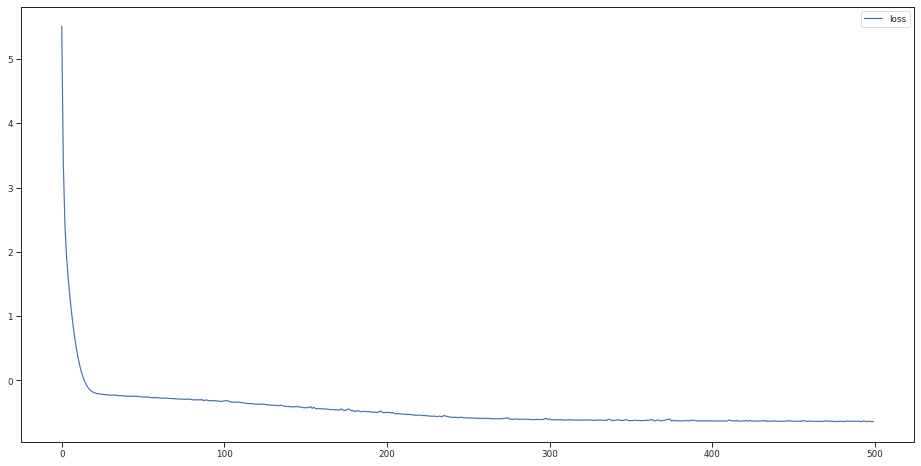

In [24]:
hist_df = pd.DataFrame(hist.history)
hist_df.plot(figsize=(16,8)), hist_df.loss.min()

### Result

In [25]:
# Get the distribution for a single x-values (unconditioned so they are all 1)
flow = flow_model(np.ones(1, dtype='float32'))

Mean of data  0.57680637  Mean of Distribution  [0.583376]
Spread of data  0.19100468


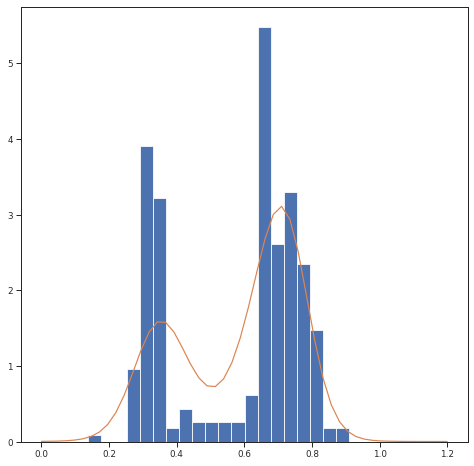

In [26]:
times = np.linspace(0,1.2)
fp = flow.prob(times)

fig = plt.figure(figsize=(8,8))
plt.hist(y, 20, density=True)
plt.plot(times, fp)

print("Mean of data ", np.mean(y), " Mean of Distribution ", flow.mean().numpy())
print("Spread of data ", np.std(y))

The Normalizng Flow is flexible enough to represent even very non Gaussian Distributions.

In [27]:
b2 = flow.bijector.bijector.bijectors[0].shift
a2 = flow.bijector.bijector.bijectors[1].scale
theta = flow.bijector.bijector.bijectors[2].theta
b1 = flow.bijector.bijector.bijectors[4].shift
a1 = flow.bijector.bijector.bijectors[5].scale

In [28]:
print(f"""
a1 = {repr(a1.numpy())}
b1 = {repr(b1.numpy())}
theta = {repr(theta.numpy())}
a2 = {repr(a2.numpy())}
b2 = {repr(b2.numpy())}
""")


a1 = 6.0772066
b1 = -2.8852947
theta = array([-2.3705459 , -0.25191736,  2.6356184 ,  2.6496308 ,  2.6518803 ,
        2.6530597 ,  2.6550798 ,  2.663907  ,  9.290908  ], dtype=float32)
a2 = 0.80074483
b2 = -2.5504248



### Sample

In [29]:
flow.sample(2)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.30765367],
       [0.34521076]], dtype=float32)>